# Mushroom Classification

The objective of this activity is to employ the grid and randomized search strategies to find an optimal model capable of discerning whether a particular mushroom species is poisonous or not given attributed relating to its appearance.

### 1. Load the data into Python and call the object mushrooms.

Import pandas.

In [1]:
import pandas as pd

Read the data. Note the lack of header.

In [2]:
mushrooms = pd.read_csv('./agaricus-lepiota.data', header=None)

View the data.

In [3]:
mushrooms

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 2.	Separate the target y and features X from the dataset. 

In [4]:
y_raw = mushrooms.iloc[:,0]

X_raw = mushrooms.iloc[:,1:]

### 3.	Recode the target y such that poisonous mushrooms are represented as 1, edible mushrooms as 0.

In [5]:
y = (y_raw == 'p') * 1

In [6]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int64

### 4.	The featureset X will need to have its columns transformed into a numpy array with a binary representation. This is known as ‘one hot encoding.’

Import preprocessing.

In [7]:
from sklearn import preprocessing

Create and fit the encoder then transform the data.

In [8]:
encoder = preprocessing.OneHotEncoder()

encoder.fit(X_raw)

X = encoder.transform(X_raw).toarray()

View the data.

In [9]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 5.	Conduct both a grid and random search to find an optimal hyperparameterization for a random forest classifier. Use accuracy as your method of model evaluation. Which method of tuning is more effective?

Import ensemble.

In [10]:
from sklearn import ensemble

Create the random forest classifer.

In [11]:
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=150)

Import model select, define the grid, set up the grid search, start the grid search and visualise the results.

In [12]:
from sklearn import model_selection

grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}

gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, cv=5, scoring='accuracy')

gscv.fit(X,y)

results = pd.DataFrame(gscv.cv_results_)

results.sort_values('rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.205605,0.006029,0.013414,0.000670,entropy,10,"{'criterion': 'entropy', 'max_features': 10}",0.842558,1.0,0.999385,1.0,0.868227,0.942024,0.071212,1
10,0.192582,0.008552,0.013272,0.000488,entropy,8,"{'criterion': 'entropy', 'max_features': 8}",0.842558,1.0,1.000000,1.0,0.860837,0.940670,0.072887,2
13,0.224842,0.008130,0.013087,0.000680,entropy,14,"{'criterion': 'entropy', 'max_features': 14}",0.842558,1.0,0.998769,1.0,0.858990,0.940054,0.073095,3
3,0.194006,0.005535,0.013497,0.000843,gini,8,"{'criterion': 'gini', 'max_features': 8}",0.842558,1.0,1.000000,1.0,0.839901,0.936484,0.077787,4
8,0.173665,0.008757,0.014978,0.000544,entropy,4,"{'criterion': 'entropy', 'max_features': 4}",0.842558,1.0,1.000000,1.0,0.839286,0.936361,0.077940,5
2,0.182610,0.004831,0.013887,0.000415,gini,6,"{'criterion': 'gini', 'max_features': 6}",0.842558,1.0,1.000000,1.0,0.814655,0.931438,0.084425,6
9,0.184293,0.008200,0.014524,0.001142,entropy,6,"{'criterion': 'entropy', 'max_features': 6}",0.842558,1.0,1.000000,1.0,0.807882,0.930084,0.086320,7
1,0.168328,0.008412,0.014293,0.000439,gini,4,"{'criterion': 'gini', 'max_features': 4}",0.842558,1.0,1.000000,1.0,0.807266,0.929961,0.086495,8
6,0.256217,0.027046,0.013437,0.000322,gini,14,"{'criterion': 'gini', 'max_features': 14}",0.842558,1.0,0.999385,1.0,0.807266,0.929838,0.086395,9
4,0.206674,0.006591,0.013332,0.000456,gini,10,"{'criterion': 'gini', 'max_features': 10}",0.842558,1.0,0.999385,1.0,0.803571,0.929099,0.087449,10


### 6.	Plot mean test score vs hyperparameterization for the top 10 models found. Can you spot any obvious patterns?

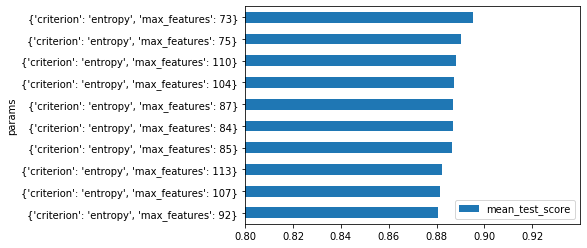

In [16]:
(
    results
    .sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .head(10).plot.barh(x='params', xlim=(0.8))
)

Import the stats models, define the parameter dictionary an any distributions, conduct a randomized search and visualise the results.

In [14]:
from scipy import stats

max_features = X.shape[1]

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}

rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)

rscv.fit(X,y)

results = pd.DataFrame(rscv.cv_results_)

results.sort_values('rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.910722,0.122850,0.012188,0.000543,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.000000,1.0,0.996308,1.0,0.719212,0.943131,0.111935,1
25,0.968360,0.129808,0.012598,0.000330,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.000000,1.0,0.996308,1.0,0.719212,0.943131,0.111935,1
49,0.229795,0.018561,0.013836,0.001492,entropy,11,"{'criterion': 'entropy', 'max_features': 11}",0.842558,1.0,1.000000,1.0,0.869458,0.942393,0.071058,3
46,0.946848,0.111090,0.012138,0.000554,gini,107,"{'criterion': 'gini', 'max_features': 107}",1.000000,1.0,0.996308,1.0,0.715517,0.942393,0.113412,3
10,0.978365,0.145278,0.012422,0.000749,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.000000,1.0,0.996308,1.0,0.715517,0.942393,0.113412,3
6,0.930809,0.133427,0.012341,0.000712,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.000000,1.0,0.996308,1.0,0.711823,0.941654,0.114889,6
20,0.222741,0.012766,0.015306,0.000940,entropy,8,"{'criterion': 'entropy', 'max_features': 8}",0.842558,1.0,1.000000,1.0,0.860837,0.940670,0.072887,7
3,0.240463,0.015119,0.014554,0.001275,gini,11,"{'criterion': 'gini', 'max_features': 11}",0.842558,1.0,1.000000,1.0,0.845443,0.937592,0.076431,8
29,1.007326,0.168993,0.012061,0.000600,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.000000,1.0,0.996308,1.0,0.685961,0.936484,0.125232,9
27,0.678332,0.067525,0.012818,0.000953,gini,64,"{'criterion': 'gini', 'max_features': 64}",0.921279,1.0,0.996308,1.0,0.760468,0.935623,0.092564,10


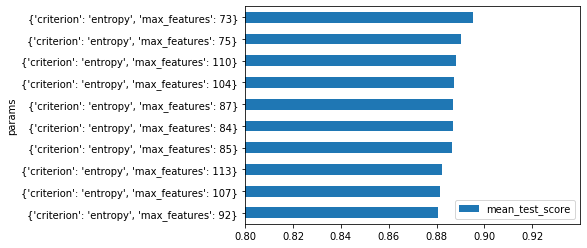

In [15]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)

(
    results.sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .drop_duplicates()
    .head(10)
    .plot.barh(x='params', xlim=(0.8))
)